# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [25]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [26]:
import tensorflow as tf

# Specify the correct path to the 'train' directory
train_dir = r'C:\Users\kondu\.cache\kagglehub\datasets\vipoooool\new-plant-diseases-dataset\versions\2\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train'

# Load the training dataset
training_set = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

print("Training set loaded successfully.")


Found 70295 files belonging to 38 classes.
Training set loaded successfully.


### Validation Image Preprocessing

In [27]:
import tensorflow as tf

# Specify the correct path to the 'valid' directory
valid_dir = r'C:\Users\kondu\.cache\kagglehub\datasets\vipoooool\new-plant-diseases-dataset\versions\2\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid'

# Load the validation dataset
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

print("Validation set loaded successfully.")


Found 17572 files belonging to 38 classes.
Validation set loaded successfully.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [28]:
cnn = tf.keras.models.Sequential()


### Building Convolution Layer

In [29]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [30]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [31]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [32]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [33]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [34]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [35]:
cnn.add(tf.keras.layers.Flatten())

In [36]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [37]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [38]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

### Compiling and Training Phase

In [39]:
cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # No need for legacy
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [40]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1293s 587ms/step - accuracy: 0.3660 - loss: 2.2782 - val_accuracy: 0.8215 - val_loss: 0.5629
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1115s 508ms/step - accuracy: 0.8215 - loss: 0.5714 - val_accuracy: 0.8829 - val_loss: 0.3675
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 790s 360ms/step - accuracy: 0.8957 - loss: 0.3260 - val_accuracy: 0.9199 - val_loss: 0.2465
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 773s 352ms/step - accuracy: 0.9305 - loss: 0.2113 - val_accuracy: 0.9376 - val_loss: 0.1964
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1210s 551ms/step - accuracy: 0.9473 - loss: 0.1600 - val_accuracy: 0.9410 - val_loss: 0.1827
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 799s 364ms/step - accuracy: 0.9603 - loss: 0.1181 - val_accuracy: 0.9437 - val_loss: 0.1865
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 800s 364ms/step - accuracy: 0.9679 - loss: 0.0990 - val_accuracy: 0.9585 - val_loss: 0.1280
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 876s 399ms/step -

## Evaluating Model

In [58]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 216s 98ms/step - accuracy: 0.9904 - loss: 0.0307
Training accuracy: 0.9915072321891785


In [43]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 56s 102ms/step - accuracy: 0.9651 - loss: 0.1197
Validation accuracy: 0.9640336632728577


### Saving Model

In [73]:
cnn.save('trained_plant_disease_model.keras')

In [45]:
training_history.history #Return Dictionary of history

{'accuracy': [0.5697702765464783,
  0.8478696942329407,
  0.9070062041282654,
  0.9363112449645996,
  0.952372133731842,
  0.9625862240791321,
  0.9699978828430176,
  0.9749910831451416,
  0.9771960973739624,
  0.980766773223877],
 'loss': [1.4679028987884521,
  0.4803381562232971,
  0.2861142158508301,
  0.1946120411157608,
  0.14445213973522186,
  0.11250688135623932,
  0.09119495004415512,
  0.07536397129297256,
  0.06999694555997849,
  0.05934566631913185],
 'val_accuracy': [0.8214773535728455,
  0.8829387426376343,
  0.9199294447898865,
  0.937571108341217,
  0.9409856796264648,
  0.9437173008918762,
  0.9585135579109192,
  0.9337013363838196,
  0.9601069688796997,
  0.9640336632728577],
 'val_loss': [0.5629030466079712,
  0.3674701452255249,
  0.2464519888162613,
  0.1964137703180313,
  0.18271753191947937,
  0.18646417558193207,
  0.12802854180335999,
  0.24399007856845856,
  0.1286839246749878,
  0.11866932362318039]}

In [75]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [76]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy Visualization

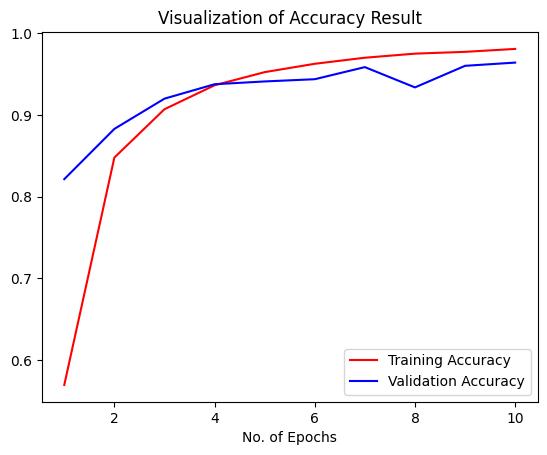

In [77]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [78]:
class_name = validation_set.class_names

In [98]:
test_set = tf.keras.utils.image_dataset_from_directory(
    r'C:\Users\kondu\.cache\kagglehub\datasets\vipoooool\new-plant-diseases-dataset\versions\2\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid',  # Use raw string for Windows paths
    labels="inferred",
    label_mode="categorical",  # One-hot encoded labels
    class_names=None,  # Automatically infer class names
    color_mode="rgb",  # Load images in RGB format
    batch_size=1,  # Load one image at a time
    image_size=(128, 128),  # Resize images to 128x128
    shuffle=False,  # Maintain file order for validation
    seed=None,  # No specific seed for randomness
    interpolation="bilinear",  # Default resizing interpolation
    follow_links=False,  # Do not follow symbolic links
    crop_to_aspect_ratio=False  # Do not crop, keep original aspect ratio
)

Found 17572 files belonging to 38 classes.


In [99]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 176s 10ms/step


In [100]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [101]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [102]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [103]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [104]:
import tensorflow as tf

# If Y_true is a tensor, convert it to a NumPy array
if tf.is_tensor(Y_true):
    Y_true = Y_true.numpy()  # Convert to NumPy array

# Now you can safely use set() and len()
print(len(set(Y_true)))
print(set(Y_true))


38
{np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37)}


In [105]:
print(f"Unique classes in Y_true: {unique_classes}")
print(f"Number of unique classes: {len(unique_classes)}")
print(f"Target names (class_name): {class_name}")
print(f"Number of target names: {len(class_name)}")


Unique classes in Y_true: [0]
Number of unique classes: 1
Target names (class_name): ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Sept

In [106]:
# Debugging the source of Y_true
print(f"First 10 entries of Y_true: {Y_true[:10]}")


First 10 entries of Y_true: [0 0 0 0 0 0 0 0 0 0]


In [107]:
import numpy as np

# Convert TensorFlow tensor to NumPy array or list
predicted_categories_np = predicted_categories.numpy() if hasattr(predicted_categories, 'numpy') else np.array(predicted_categories)

# Debugging information
print(f"Unique predicted categories: {set(predicted_categories_np)}")
print(f"First 10 predictions: {predicted_categories_np[:10]}")


Unique predicted categories: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37)}
First 10 predictions: [ 0  0  0 25  0  0  0  0  0  0]


In [108]:
print(f"Shape of Y_true: {Y_true.shape}")
print(f"Sample values of Y_true: {Y_true[:20]}")


Shape of Y_true: (17572,)
Sample values of Y_true: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [109]:
from sklearn.metrics import classification_report

# Adjust for the single class in Y_true
relevant_classes = [0]  # Only include the present class
adjusted_target_names = [class_name[0]]  # Target names for class 0

print(classification_report(
    Y_true,
    predicted_categories,
    labels=relevant_classes,
    target_names=adjusted_target_names
))



                    precision    recall  f1-score   support

Apple___Apple_scab       0.98      0.92      0.95       504

         micro avg       0.98      0.92      0.95       504
         macro avg       0.98      0.92      0.95       504
      weighted avg       0.98      0.92      0.95       504



In [110]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.92      0.95       504
                                 Apple___Black_rot       0.98      0.98      0.98       497
                          Apple___Cedar_apple_rust       0.99      0.94      0.96       440
                                   Apple___healthy       0.97      0.97      0.97       502
                               Blueberry___healthy       1.00      0.96      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.99      0.99       421
                 Cherry_(including_sour)___healthy       0.97      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.90      0.92       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.92      0.98      0.

### Confusion Matrix Visualization

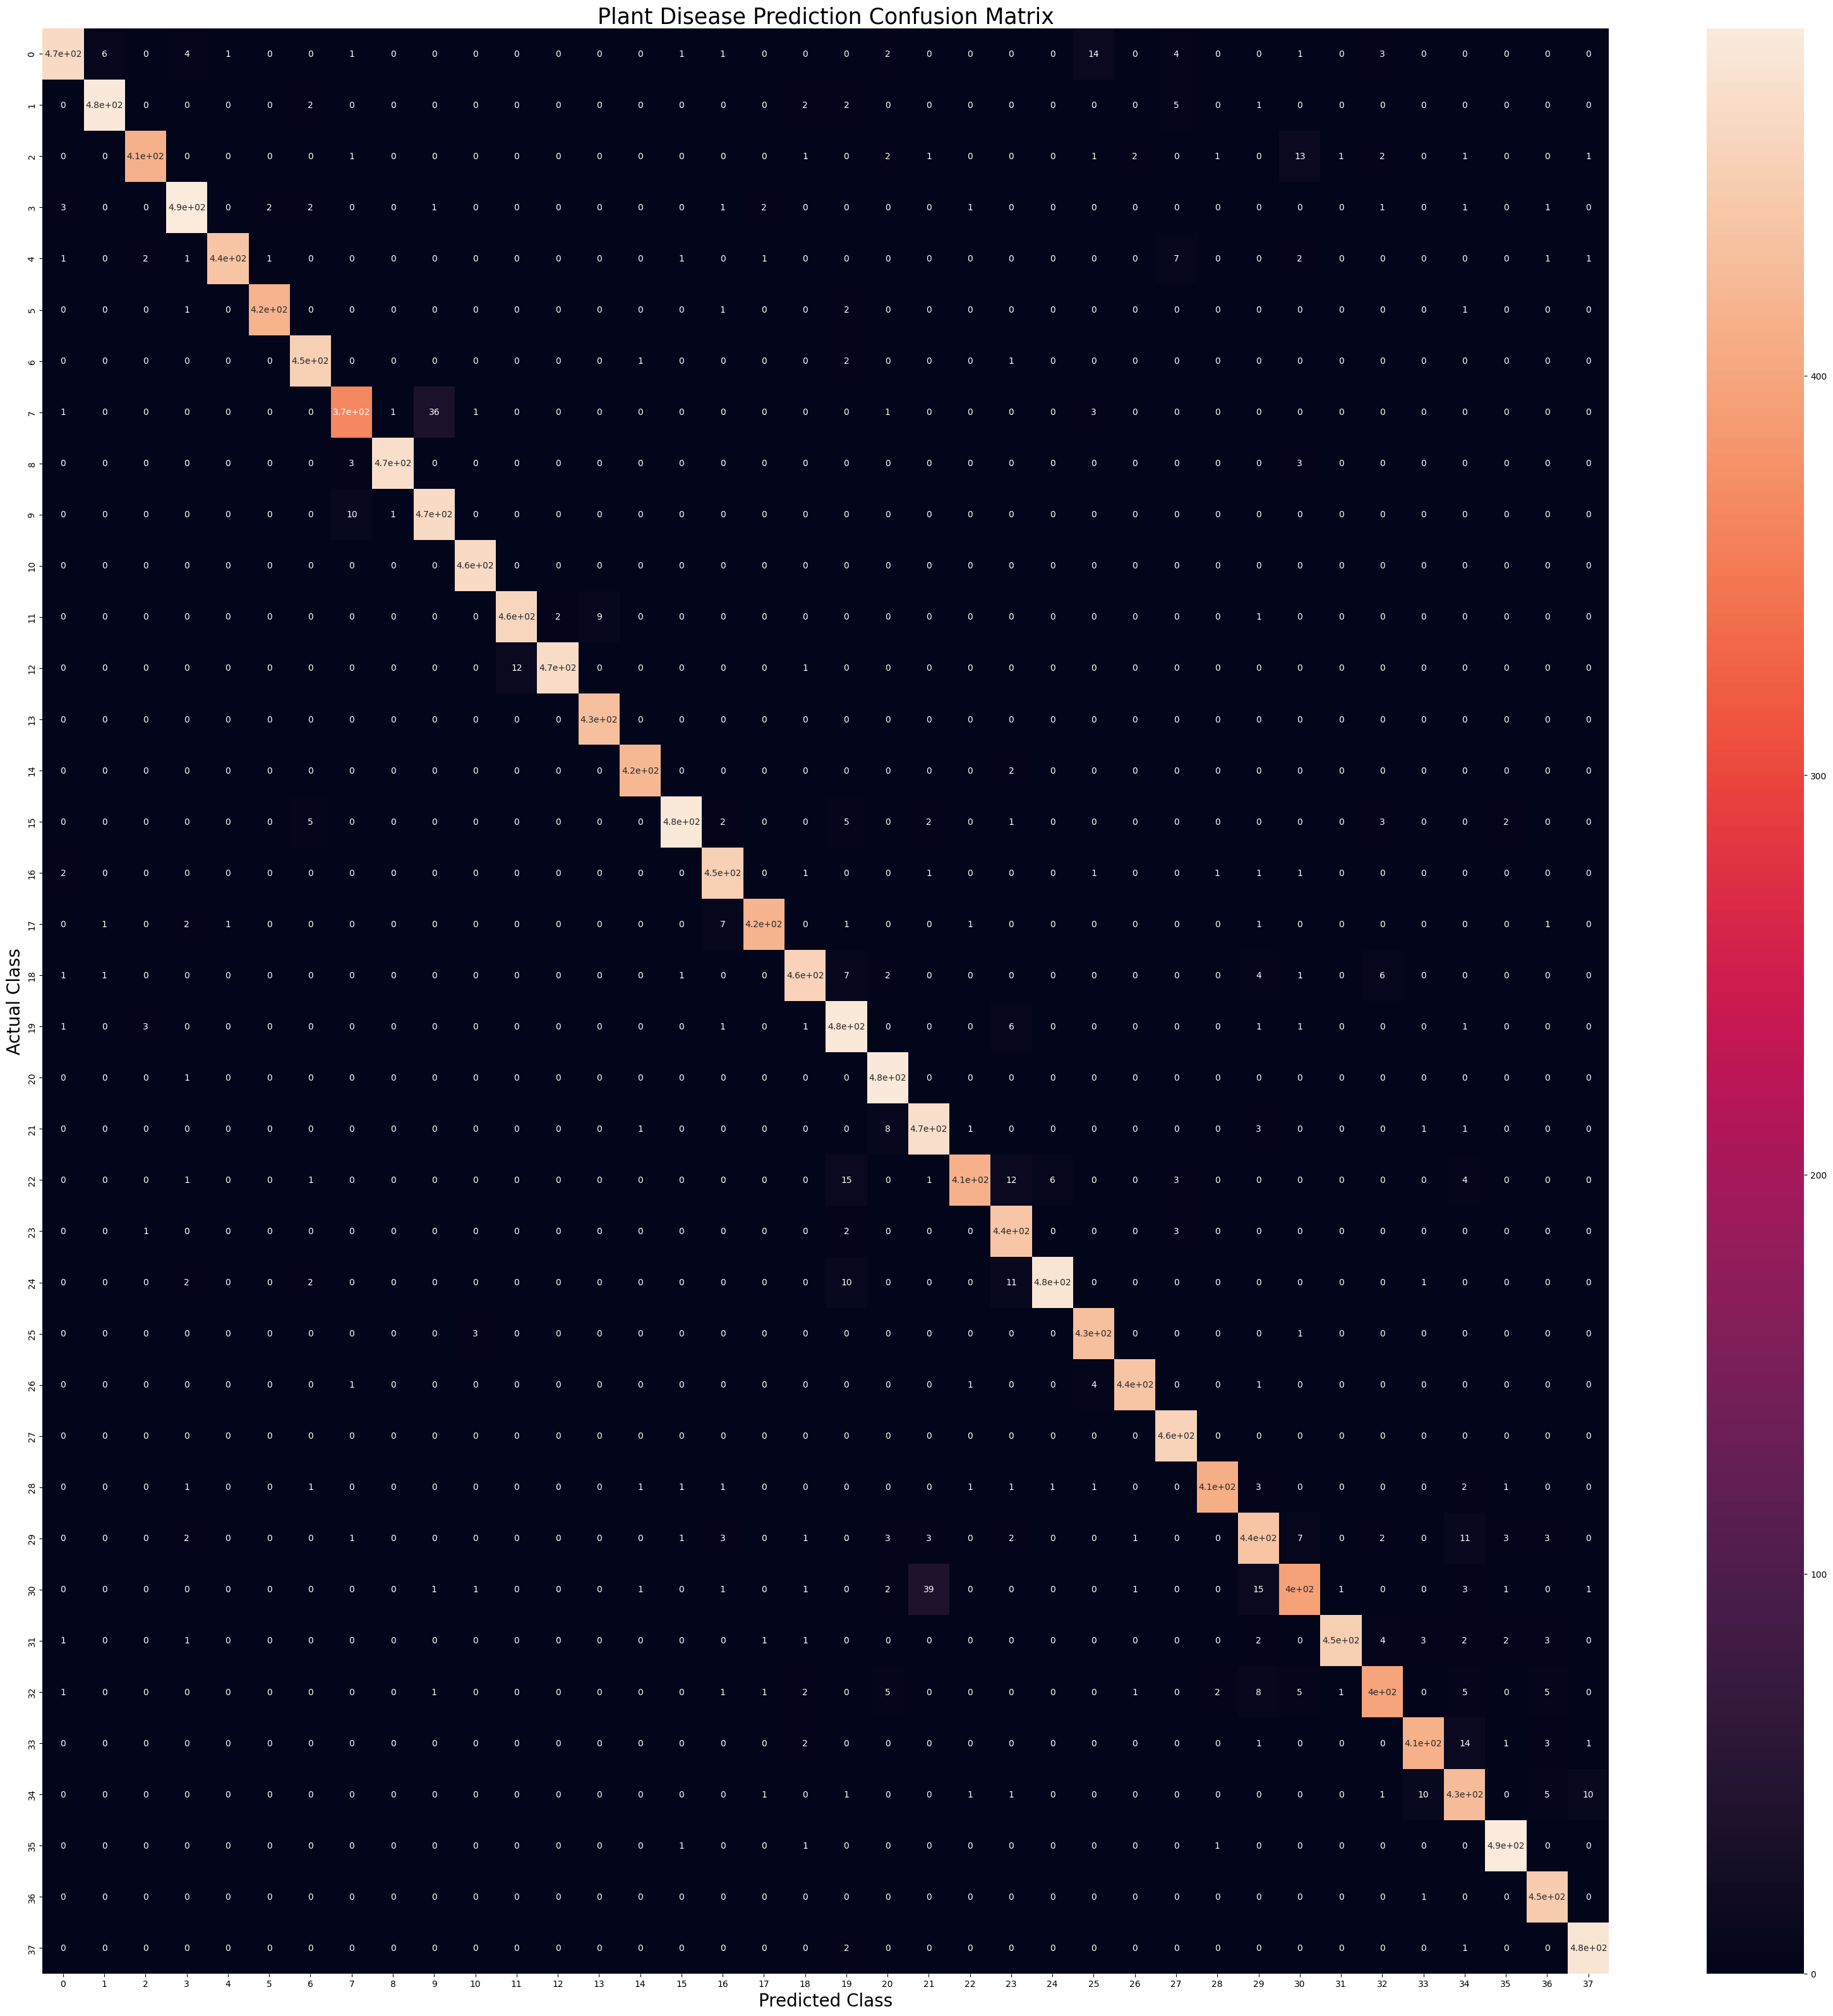

In [111]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()